In [ ]:
-from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import keras
from keras.optimizers import Adam
print("[INFO]: Tensorflow version{}".format(tf.__version__))
state_gpu = tf.test.gpu_device_name()
print("[INFO]: GPU usage{0}".format(state_gpu))

[INFO]: Tensorflow version2.12.0
[INFO]: GPU usage/device:GPU:0


In [ ]:
ROT_RANGE = 10
#sử dụng lớp ImageDataGenerator để tạo ra các hình ảnh mới từ tập dữ liệu huấn luyện hiện có
# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(
rescale = 1./255,
rotation_range = ROT_RANGE,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

valid_gen = ImageDataGenerator(rescale = 1./255)


In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/train' 
VALIDATION_DIR = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/valid'
TEST_DIR = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/test'

In [ ]:
TARGET_SIZE = (224,224)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42
#sử dụng đối tượng ImageDataGenerator từ thư viện Keras để tạo ra dữ liệu huấn luyện dưới dạng luồng từ thư mục được chỉ
#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)

valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)


TEST_BATCH_SIZE = 1
test_data = valid_gen.flow_from_directory(
TEST_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TEST_BATCH_SIZE,
shuffle=False
)

Found 12795 images belonging to 10 classes.
Found 3667 images belonging to 10 classes.
Found 1841 images belonging to 10 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
image_size = [224, 224]
base_model= VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)
for layer in base_model.layers:
    layer.trainable = False
x = Flatten()(base_model.output)
prediction = Dense(10, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = prediction)
# x = keras.layers.Flatten() (base_model.output)
# x = keras.layers.Dense(256, activation="relu")(x)
# x = keras.layers.Dropout(0.25)(x)
# output = keras.layers.Dense(16, activation='softmax')(x)
# model = keras.models.Model(inputs=base_model.input, outputs=output)

# # The newly added layers are initialized with random values.
# # Make sure based model remain unchanged until newly added layers weights get reasonable values.
# for layer in base_model.layers:
#     layer.trainable = False
    

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
LEARNING_RATE = 0.0001
#LEARNING_RATE = 0.001

#Optimizer
opt = Adam(lr = LEARNING_RATE)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
TRAINING_NUM = train_data.n 
VALID_NUM = valid_data.n
EPOCHS = 10

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

history = model.fit(train_data,
                              validation_data = valid_data,
                              epochs = EPOCHS,
                              steps_per_epoch = STEP_SIZE_TRAIN,
                              validation_steps = STEP_SIZE_VALID                          
                
                             )

Epoch 1/10
99/99 [==============================] - 6321s 64s/step - loss: 1.7565 - accuracy: 0.4516 - val_loss: 1.2829 - val_accuracy: 0.6173
Epoch 2/10
99/99 [==============================] - 251s 3s/step - loss: 1.2193 - accuracy: 0.6418 - val_loss: 1.0230 - val_accuracy: 0.6848
Epoch 3/10
99/99 [==============================] - 255s 3s/step - loss: 1.0179 - accuracy: 0.6984 - val_loss: 0.8658 - val_accuracy: 0.7418
Epoch 4/10
99/99 [==============================] - 253s 3s/step - loss: 0.9119 - accuracy: 0.7304 - val_loss: 0.7847 - val_accuracy: 0.7555
Epoch 5/10
99/99 [==============================] - 250s 3s/step - loss: 0.8360 - accuracy: 0.7501 - val_loss: 0.6934 - val_accuracy: 0.7903
Epoch 6/10
99/99 [==============================] - 246s 2s/step - loss: 0.7772 - accuracy: 0.7670 - val_loss: 0.6495 - val_accuracy: 0.8089
Epoch 7/10
99/99 [==============================] - 245s 2s/step - loss: 0.7264 - accuracy: 0.7875 - val_loss: 0.6292 - val_accuracy: 0.8130
Epoch 8/10


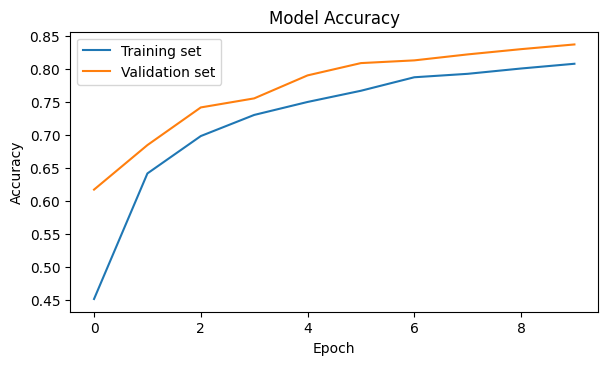

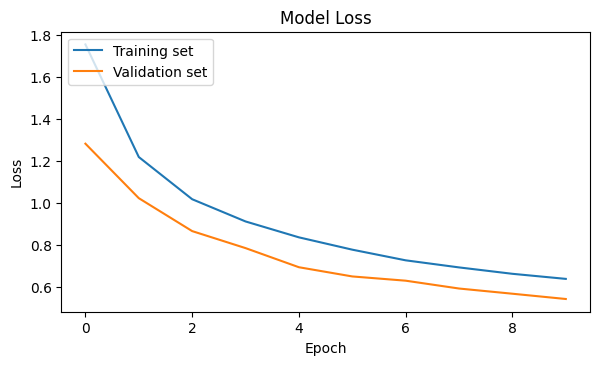

In [ ]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15,8)) 
    
plt.subplot(221)  
# Accuracy 
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8)) 
plt.subplot(222)  
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 83.71710777282715


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate (This ensures the base model weights do not change a lot)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
TRAINING_NUM = train_data.n #or train_data.samples
VALID_NUM = valid_data.n
EPOCHS = 10

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

# Fit model to get reasonable weights for newly added layers.
history = model.fit(train_data,
                             steps_per_epoch = STEP_SIZE_TRAIN,
                             validation_data = valid_data,
                             validation_steps = STEP_SIZE_VALID,
                             epochs = EPOCHS)

Epoch 1/10
99/99 [==============================] - 346s 3s/step - loss: 0.4823 - accuracy: 0.8412 - val_loss: 0.3631 - val_accuracy: 0.8862
Epoch 2/10
99/99 [==============================] - 289s 3s/step - loss: 0.3501 - accuracy: 0.8835 - val_loss: 0.3056 - val_accuracy: 0.9021
Epoch 3/10
99/99 [==============================] - 292s 3s/step - loss: 0.2998 - accuracy: 0.8984 - val_loss: 0.2630 - val_accuracy: 0.9147
Epoch 4/10
99/99 [==============================] - 291s 3s/step - loss: 0.2527 - accuracy: 0.9151 - val_loss: 0.1882 - val_accuracy: 0.9370
Epoch 5/10
99/99 [==============================] - 293s 3s/step - loss: 0.2157 - accuracy: 0.9258 - val_loss: 0.2255 - val_accuracy: 0.9238
Epoch 6/10
99/99 [==============================] - 289s 3s/step - loss: 0.1911 - accuracy: 0.9366 - val_loss: 0.1963 - val_accuracy: 0.9348
Epoch 7/10
99/99 [==============================] - 291s 3s/step - loss: 0.1768 - accuracy: 0.9414 - val_loss: 0.1504 - val_accuracy: 0.9518
Epoch 8/10
99

In [ ]:
model.save("model.h5")

In [ ]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 95.17543911933899


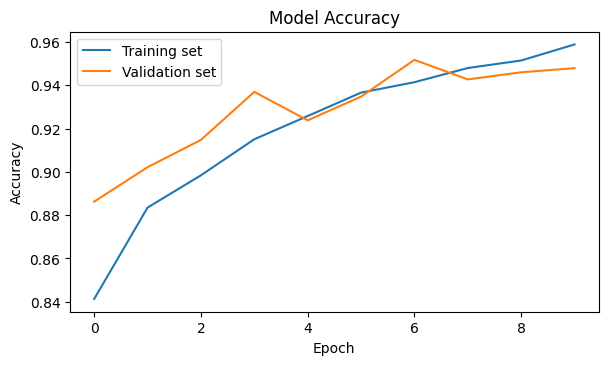

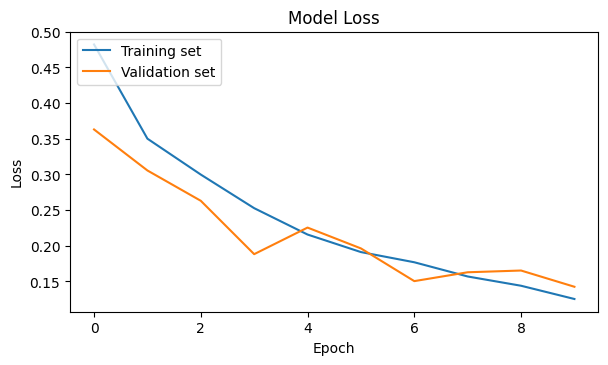

In [ ]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15,8)) 
    
plt.subplot(221)  
# Accuracy 
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8)) 
plt.subplot(222)  
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
# Evaluation on test dataset
test_loss, test_score = model.evaluate(test_data)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

1841/1841 [==============================] - 753s 409ms/step - loss: 0.1349 - accuracy: 0.9517
Loss on test set:  0.1348511278629303
Accuracy on test set:  0.951656699180603


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
# Get predictions
preds = model_load.predict(test_data)
preds = np.argmax(preds, axis=-1)

# Original labels
#orig_test_labels = np.argmax(test_labels, axis=-1)

#print(orig_test_labels.shape)
print(preds)
print(test_data.classes)
accuracy = accuracy_score(test_data.classes, preds)
print("Test Accuracy:", accuracy)

1841/1841 [==============================] - 353s 187ms/step
[0 0 0 ... 9 9 9]
[0 0 0 ... 9 9 9]
Test Accuracy: 0.9516567083107007


#Confusion Matrix and Classification Report

In [ ]:
import os
data_dir = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/train'

Y_pred = model.predict_generator(test_data, test_data.samples // test_data.batch_size)
y_pred = np.argmax(Y_pred, axis=1)


print('Classification Report')
target_names = sorted(os.listdir(data_dir))
print(classification_report(test_data.classes, y_pred, target_names=target_names))


#Evaluating using Keras model_evaluate:
x, y = zip(*(test_data[i] for i in range(len(test_data))))
x_test, y_test = np.vstack(x), np.vstack(y)
loss, acc = model.evaluate(x_test, y_test)

print("Accuracy: " ,acc)
print("Loss: ", loss)

<ipython-input-32-f230bffe03f8>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_data, test_data.samples // test_data.batch_size)


Classification Report
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.98      0.96      0.97       171
                        Tomato___Early_blight       0.96      0.94      0.95       192
                         Tomato___Late_blight       0.97      0.94      0.96       186
                           Tomato___Leaf_Mold       0.99      0.91      0.95       189
                  Tomato___Septoria_leaf_spot       0.94      0.99      0.96       175
Tomato___Spider_mites Two-spotted_spider_mite       0.93      0.91      0.92       175
                         Tomato___Target_Spot       0.83      0.91      0.87       184
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.96      0.98       197
                 Tomato___Tomato_mosaic_virus       0.97      0.99      0.98       179
                             Tomato___healthy       0.95      1.00      0.97       193

                   

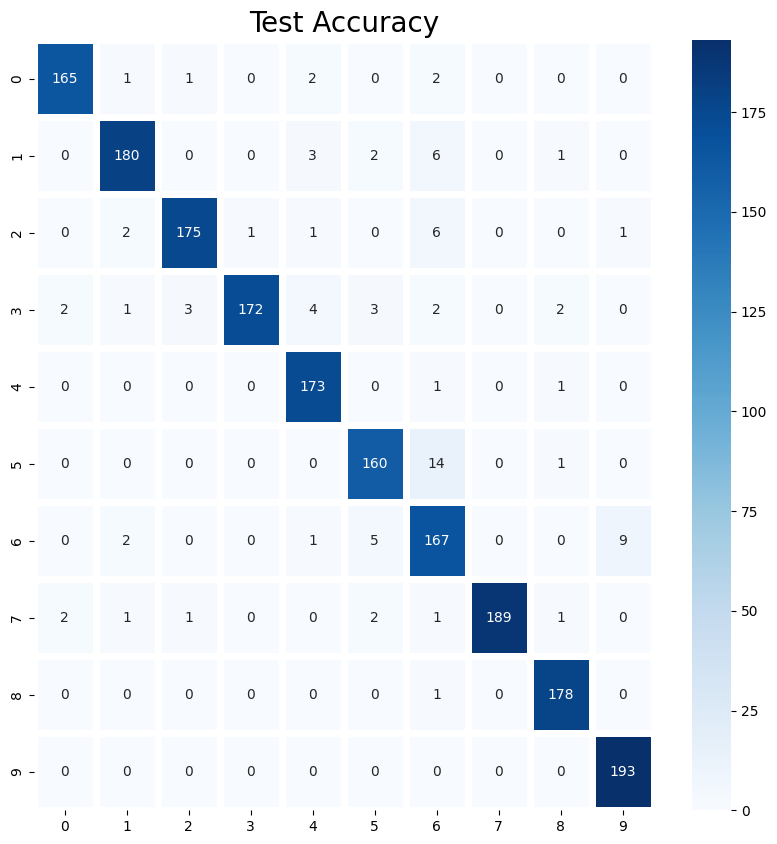

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion_mtx = confusion_matrix(test_data.classes, preds)

#ax = plt.axes()
fig, ax = plt.subplots(figsize=(10,10)) 

sn.heatmap(confusion_mtx, linewidth=5, annot=True,annot_kws={"size": 10}, cmap="Blues", ax = ax,fmt='d')
ax.set_title('Test Accuracy', size=20)
plt.show()

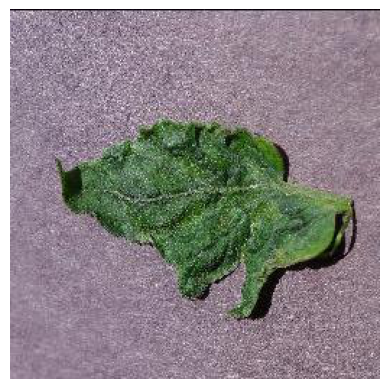

1/1 [==============================] - 0s 161ms/step
Class 0: Tomato___Bacterial_spot - 0.00%
Class 1: Tomato___Early_blight - 0.00%
Class 2: Tomato___Late_blight - 0.00%
Class 3: Tomato___Leaf_Mold - 0.00%
Class 4: Tomato___Septoria_leaf_spot - 0.00%
Class 5: Tomato___Spider_mites Two-spotted_spider_mite - 0.00%
Class 6: Tomato___Target_Spot - 0.00%
Class 7: Tomato___Tomato_Yellow_Leaf_Curl_Virus - 0.00%
Class 8: Tomato___Tomato_mosaic_virus - 100.00%
Class 9: Tomato___healthy - 0.00%
Predicted class: Tomato___Tomato_mosaic_virus


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh cần dự đoán
image_path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/test/Tomato___Tomato_mosaic_virus/58ddf6d1-0e20-4c35-944f-d50c922a07d8___PSU_CG 2415_90deg.JPG"

image = Image.open(image_path)
# Hiển thị ảnh
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path)
image = image.resize((224, 224))  
image = np.array(image) / 255.0 
image = np.expand_dims(image, axis=0) 

predictions = model.predict(image)
num_classes = predictions.shape[1]

percentages = predictions[0] / np.sum(predictions[0]) * 100

class_names = sorted(os.listdir(data_dir))

for class_idx, percentage in enumerate(percentages):
    class_name = class_names[class_idx]
    print("Class {}: {} - {:.2f}%".format(class_idx, class_name, percentage))


predicted_class = np.argmax(predictions)
confidence = np.max(predictions)

predicted_class_name = class_names[predicted_class]
confidence = np.max(predictions)

# Tính phần trăm dự đoán
total_predictions = np.sum(predictions)
percentage = confidence / total_predictions * 100

print("Predicted class:", predicted_class_name)

In [ ]:
model_load = keras.models.load_model('/content/drive/MyDrive/modelVGG16.h5')

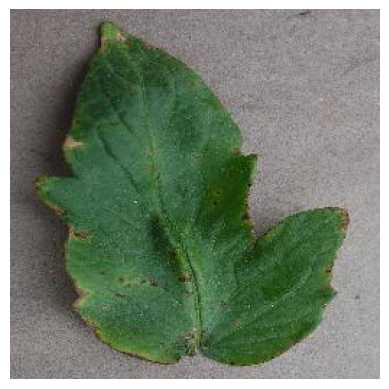

1/1 [==============================] - 0s 143ms/step
Class 0: Tomato___Bacterial_spot - 0.99%
Class 1: Tomato___Early_blight - 0.00%
Class 2: Tomato___Late_blight - 0.00%
Class 3: Tomato___Leaf_Mold - 0.00%
Class 4: Tomato___Septoria_leaf_spot - 0.00%
Class 5: Tomato___Spider_mites Two-spotted_spider_mite - 0.00%
Class 6: Tomato___Target_Spot - 0.00%
Class 7: Tomato___Tomato_Yellow_Leaf_Curl_Virus - 0.00%
Class 8: Tomato___Tomato_mosaic_virus - 0.00%
Class 9: Tomato___healthy - 0.00%
Predicted class: Tomato___Bacterial_spot


In [ ]:
# Đường dẫn tới ảnh cần dự đoán
image_path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/test/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG"
image = Image.open(image_path)
# Hiển thị ảnh
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path)
image = image.resize((224, 224))  
image = np.array(image) / 255.0 
image = np.expand_dims(image, axis=0) 

predictions = model_load.predict(image)
num_classes = predictions.shape[1]

class_names = sorted(os.listdir(data_dir))

for class_idx, percentage in enumerate(predictions[0]):
    class_name = class_names[class_idx]
    print("Class {}: {} - {:.2f}%".format(class_idx, class_name, percentage))

predicted_class = np.argmax(predictions)
confidence = np.max(predictions)

predicted_class_name = class_names[predicted_class]
confidence = np.max(predictions)

# Tính phần trăm dự đoán
total_predictions = np.sum(predictions)
percentage = confidence / total_predictions * 100

print("Predicted class:", predicted_class_name)